# Week of Oct21 HW

#### 1:

$$y = \beta_0 + \beta_1 x + \varepsilon$$ is the equation for a simple linear regression model. 

Components of the linear regression model:
- $y$: predictor variable (output of the model; the dependent variable we are estimating)
- $x$: outcome variable (input of the model; the independent variable we are using to estimate the predictor variable)
- $\beta_1$: slope coefficient (slope of the linear curve)
- $\beta_0$: intercept coefficient (y-intercept of the linear curve)
- $\varepsilon$: error term (vertical difference from predicted and observed values at a single point)

The aim for the Linear Regression model is to predict a dependent variable based on a input variable, using a line that best fits the data we have. 


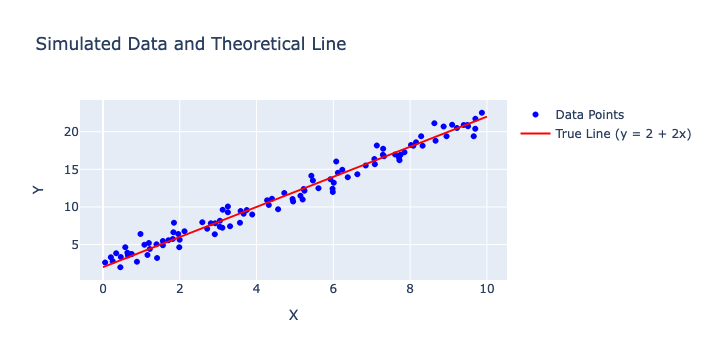

In [22]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import uniform, norm

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate 100 x values uniformly between 0 and 10
x = uniform.rvs(loc=0, scale=10, size=100)

# Step 2: Generate corresponding y values with slope 2, intercept 2 and random error from a normal distribution with std 1
slope = 2
intercept = 2
error = norm.rvs(loc=0, scale=1, size=100)
y = intercept + slope * x + error

# Step 3: Create a DataFrame with the predictor 'x' and response 'y'
df = pd.DataFrame({'x': x, 'y': y})

# Step 4: Create the theoretical line y = 2 + 2x
x_line = np.linspace(0, 10, 100)
y_line = intercept + slope * x_line

# Step 5: Plot the data points and the regression line
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter(x=df['x'], y=df['y'], mode='markers', name='Data Points', marker=dict(color='blue')))

# Add the theoretical regression line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Line (y = 2 + 2x)', line=dict(color='red')))

# Update the layout
fig.update_layout(title='Simulated Data and Theoretical Line',
                  xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the figure
fig.show()


In [5]:
slope, intercept

(2, 2)

Above are the slope, intercept that were pre-determined. We generated 100 random datapoints with those slope and intercept values, then added a random error term (generated from a normal distribution with std=1). 

#### 2:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4065.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.35e-81
Time:                        21:16:08   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

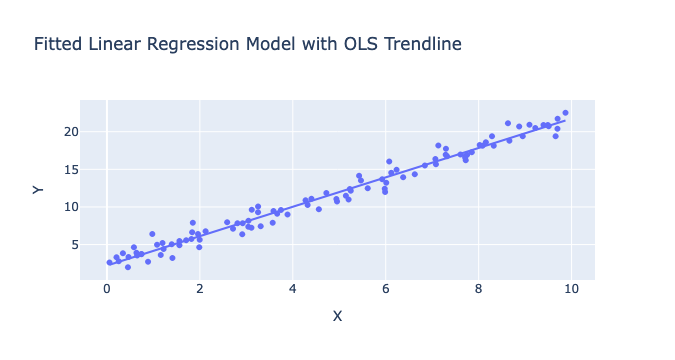

In [24]:
import plotly.express as px
import statsmodels.formula.api as smf

# Step 1: Fit the linear regression model using statsmodels
model = smf.ols(formula='y ~ x', data=df).fit()

# Display the summary of the regression results
print(model.summary())
print(model.params)
print(model.rsquared) 

# Step 3: Use Plotly Express to add the OLS trendline
fig = px.scatter(df, x='x', y='y', title='Fitted Linear Regression Model with OLS Trendline',
                 trendline='ols', labels={'x': 'X', 'y': 'Y'})

# Update traces to label the OLS trendline in the legend
fig.update_traces(selector=dict(mode='lines'), name='OLS Trendline')

# Update layout for better visualization
fig.update_layout(xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the figure
fig.show()


Process: 
1. Use ``smf.ols().fit()`` to fit a regression line to the values generated in question 1. 
3. ``model.summary()`` outputs the intercept and slope, with the standard error values for both.
   

#### 3: 


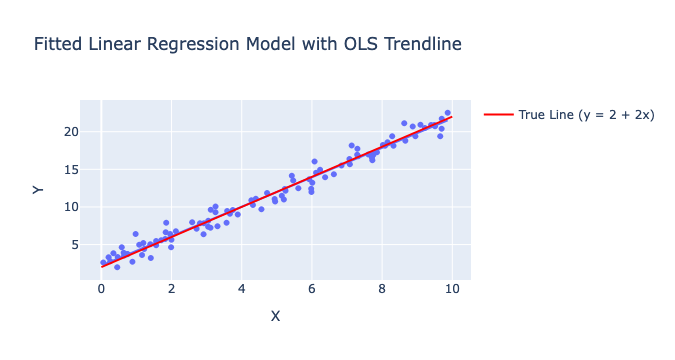

In [25]:

fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Line (y = 2 + 2x)', line=dict(color='red')))
fig.show()

In question 1, we are displaying the true line (y = 2 + 2x) and adding random error values to that to generate points. 

In question 2, we are generating a line of best fit using OLS, fitting a linear line that **best minimizes the error values between the points and the line**. This is why the equation is slightly different (y = 2.21 + 1.954x), but should better model the data points we have. ``model.fittedvalues`` then outputs all the **y** values according to that line at all **x** values to display the trendline. 

#### 4: 


``model.params`` outputs the coefficients calculated by the **linear regression model**, which are ``intercept=2.215096``, ``slope=1.954023``. This is similar, but not identical to the original true line we set, where ``intercept=2``, ``slope=2``, as the new ones should fit the data better than the original true line (due to random error). 

In ``model.fittedvalues``, we use the coefficients and the best-fit line calculated by the linear regression model to output a set of new y values based on the original x values. 

For example, at $(2, y)$, $y = 2.215(2) + 1.95 = 6.38$. 

In [26]:
model.fittedvalues, y

(0      9.533695
 1     20.792269
 2     16.518424
 3     13.913019
 4      5.263736
         ...    
 95    11.863974
 96    12.429414
 97    10.569345
 98     2.711792
 99     4.323319
 Length: 100, dtype: float64,
 array([ 9.57784945, 20.71527878, 16.73163961, 11.98560077,  4.90070092,
         5.47700298,  4.63956629, 18.8052527 , 13.21380663, 15.65969451,
         3.327092  , 21.72694815, 18.11909261,  6.76004965,  5.73357689,
         6.63673519,  7.38279177, 12.16746649, 10.24679222,  6.36106786,
        14.53317817,  5.05093249,  7.84800643,  9.09264973,  9.70602894,
        17.28287391,  5.65076113, 11.4824115 , 13.68700567,  3.33305911,
        16.03708294,  5.58506029,  3.55858225, 20.90326483, 19.39386945,
        18.14143309,  8.15250559,  6.41668439, 15.49229957, 11.10459722,
         4.40605293, 10.73486016,  3.83059324, 20.93834107,  7.96663158,
        14.34105823,  9.63701583, 10.99950936, 13.52106268,  7.88754474,
        20.40115623, 16.93635874, 20.8896302 , 19.393

In [27]:
model.params

Intercept    2.215096
x            1.954023
dtype: float64

#### 5: 

The error term (or residual) for each datapoint represents the **vertical distance from the datapoint to the trendline**. This can be calculated through 

$$\epsilon = y_i - (\beta_0 + \beta_1 x_i)$$

OLS stands for ordinary least squares. This algorithm aims to minimize the value of the **sum of residuals squared** for all data points, using calculus to find the minimum value given $\beta_0$ and $\beta_1$. 

By squaring the residuals, this ensures that we **penalize larger errors** more than smaller ones (and also makes all negative residuals positive to prevent cancelling out). 

There can also be other types of objective functions that can be used to fit a linear regression model to a dataset. 

#### 6: 

In [45]:
np.corrcoef(y, x)[0,1]**2

0.9764567983510791

In [46]:
np.corrcoef(y, model.fittedvalues)[0,1]**2

0.9764567983510791

In [33]:
model.rsquared

0.9764567983510799

In [50]:
1-((y-model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()

0.9764567983510799

``np.corrcoef()`` calculates the correlation coefficient between two sets of data, basically asking how linearly y increases when x increases, and is the same as $R^2$. 

R^2 = 1 - $\frac{RSS}{TSS}$

RSS = sum of squares of residual 

TSS = total sum of squares

This is calculated by the equation in the cell above, where the numerator is the difference between the original y-values and the fitted y-value squared, and the denominator is the difference between the original y-values to the sample average. 

**The larger the difference, the larger the number we are subtracting from 1.** Thus, this can be interpreted as a measure of the accuracy of the model.

#### 7:  ???? wtf is he asking